In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pylab as pl
import seaborn as sn

In [3]:
# contact number and center of mass were calculated by VMD script
csv_a = pd.read_csv('apo.dat', sep='\s+', header=None)
csv_h = pd.read_csv('holo.dat', sep='\s+', header=None)
csv_c = pd.read_csv('ckii.dat', sep='\s+', header=None)

cn_a = csv_a[1]
com_a = csv_a[2]
chg_a = csv_a[3]

cn_h = csv_h[1]
com_h = csv_h[2]
chg_h = csv_h[3]

cn_c = csv_c[1]
com_c = csv_c[2]
chg_c = csv_c[3]

In [4]:
cn=pd.concat([csv_a[1],csv_h[1],csv_c[1]], ignore_index=True)
com=pd.concat([csv_a[2],csv_h[2],csv_c[2]], ignore_index=True)
chg=pd.concat([csv_a[3],csv_h[3],csv_c[3]], ignore_index=True)

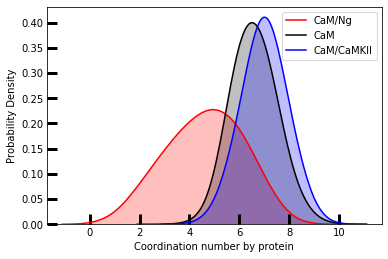

In [5]:
# Plotting the KDE Plot
ax = sn.kdeplot(cn_a, color='r', bw=0.7, shade=True, Label='CaM/Ng')
sn.kdeplot(cn_h, color='k', bw=0.7, shade=True, Label='CaM')
sn.kdeplot(cn_c, color='b', bw=0.7, shade=True, Label='CaM/CaMKII')
plt.xlabel('Coordination number by protein')
plt.ylabel('Probability Density')

ax.tick_params(axis='both', which='major', direction='in', length=10, width=3, color='k')

plt.savefig("coordination_number.pdf", format="pdf")

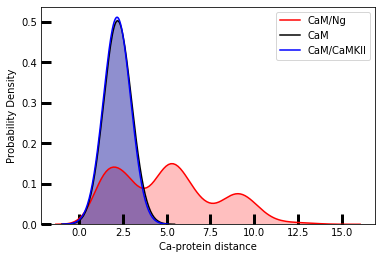

In [6]:
# Plotting the KDE Plot
ax = sn.kdeplot(com_a, color='r', bw=0.7, shade=True, Label='CaM/Ng')
sn.kdeplot(com_h, color='k', bw=0.7, shade=True, Label='CaM')
sn.kdeplot(com_c, color='b', bw=0.7, shade=True, Label='CaM/CaMKII')
plt.xlabel('Ca-protein distance')
plt.ylabel('Probability Density')

ax.tick_params(axis='both', which='major', direction='in', length=10, width=3, color='k')

plt.savefig("com.pdf", format="pdf")

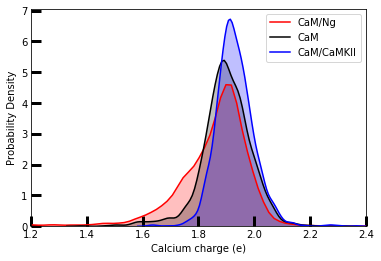

In [7]:
# Plotting the KDE Plot
ax = sn.kdeplot(chg_a, color='r',  shade=True, Label='CaM/Ng')
sn.kdeplot(chg_h, color='k', shade=True, Label='CaM')
sn.kdeplot(chg_c, color='b', shade=True, Label='CaM/CaMKII')
plt.xlabel('Calcium charge (e)')
plt.ylabel('Probability Density')

ax.tick_params(axis='both', which='major', direction='in', length=10, width=3, color='k')
#ax.xrange([1.0,2.0])
ax.set_xlim([1.2, 2.4])
plt.savefig("charge.pdf", format="pdf")

In [29]:
data = pd.concat([cn,chg], axis=1)

cn_i=list()
chg_mean_i=list()
chg_dev_i=list()
for i in sorted(data[1].unique()):
    deg_chg = data[data[1]==i][3]
    cn_i.append(i)
    chg_mean_i.append(deg_chg.mean())
    chg_dev_i.append(deg_chg.std())

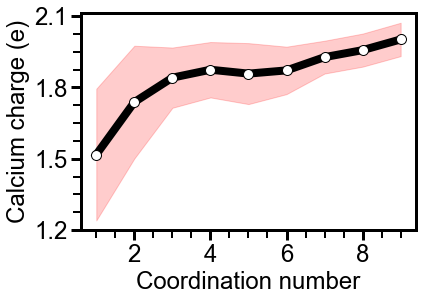

In [123]:
# Edit the font, font size, and axes width
from matplotlib.ticker import MultipleLocator

mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 24
plt.rcParams['axes.linewidth'] = 3
#fig = plt.figure(figsize=(20, 20))

plt.figure()
plt.plot(cn_i,chg_mean_i, marker='o', markersize=10, markerfacecolor='w', linewidth=8, color='k')
lowb=[chg_mean_i[j]-chg_dev_i[j] for j in range(len(chg_mean_i))]
highb=[chg_mean_i[j]+chg_dev_i[j] for j in range(len(chg_mean_i))]

plt.xticks(range(0,10,2))
plt.yticks([1.2,1.5, 1.8, 2.1])
plt.tick_params(axis='both', which='major', length=10, width=3, color='k')
plt.tick_params(axis='both', which='minor', length=8, width=2, color='k')

plt.minorticks_on()
plt.xlabel("Coordination number")
plt.ylabel("Calcium charge (e)")

plt.fill_between(cn_i, lowb, highb, color='r', alpha=0.2)
plt.savefig("charge_cn.pdf", format="pdf", dpi=600, bbox_inches='tight')